# Final Project

### Data Cleanup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/lyrics.csv.zip',index_col='index')

In [3]:
display(data.head())
data.shape

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


(362237, 5)

In [4]:
# drop na 
data = data.dropna()
data.shape

(266556, 5)

In [5]:
year = data['year'].unique()
year

array([2009, 2007, 2013, 2010, 2012, 2006, 2016, 2011, 2015, 2008, 2014,
       1998, 2002, 1995, 2004, 1972, 2005, 1978, 1970, 1981, 1994, 1997,
       1993, 1982, 1983, 1986, 1992, 1977, 1989, 1979, 1996, 2001, 1990,
       1987, 2003, 1975, 1973, 1991, 1999, 1974, 2000, 1980, 1984, 1976,
        702, 1971, 1985, 1988,  112, 1968,   67], dtype=int64)

In [6]:
# drop those in the wrong year
wrong_year = data.loc[data['year'].isin([67,2038,112,702])]
display(wrong_year)
print('Wrong Year shape',wrong_year.shape)
data.drop(data.loc[data['year'].isin([67,2038,112,702])].index, inplace=True)
data.shape

,song,year,artist,genre,lyrics
index,,,,,
27657,star,702,clipse,Hip-Hop,You're my star\nIt's such a wonder how you shi...
69708,anywhere-remix,112,dru-hill,Hip-Hop,"Here we are all alone\nYou and me, privacy\nAn..."
147914,it-s-over-now-remix,112,g-dep,Hip-Hop,What is this?\nNumbers in your pocket\nI remem...
238541,come-see-me-remix,112,black-rob,Hip-Hop,"Baby, you can come see me 'cause I need you he..."
315540,let-s-lurk,67,giggs,Hip-Hop,Verse 1:\nStill pulling up on smoke\nSkeng in ...
335205,i-can-t-believe,112,faith-evans,Pop,[Chorus]\nI can't believe that love has gone a...


Wrong Year shape (6, 5)


(266550, 5)

In [7]:
# drop Not available genre
print(data['genre'].unique())
data.drop(data.loc[data['genre']=='Not Available'].index, inplace=True)
data.shape

['Pop' 'Hip-Hop' 'Not Available' 'Rock' 'Metal' 'Other' 'Country' 'Jazz'
 'Electronic' 'Folk' 'R&B' 'Indie']


(242609, 5)

In [8]:
# check that column values are valid
print('Genres: ',np.sort(data['genre'].unique()))
print('Artist: ',np.sort(data['artist'].unique()))
print('Year: ',np.sort(data['year'].unique()))
print(data.shape)


Genres:  ['Country' 'Electronic' 'Folk' 'Hip-Hop' 'Indie' 'Jazz' 'Metal' 'Other'
 'Pop' 'R&B' 'Rock']
Artist:  ['009-sound-system' '047' '1-800-zombie' ... 'the-grates'
 'the-graveyard-boulevard' 'the-great-flood-catastrophe']
Year:  [1968 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016]
(242609, 5)


In [9]:
# lower characters
data['lyrics'] = data['lyrics'].str.lower()
data.shape
data.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"oh baby, how you doing?\nyou know i'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,if you search\nfor tenderness\nit isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"oh oh oh i, oh oh oh i\n[verse 1:]\nif i wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"party the people, the people the party it's po..."


In [10]:
# word cleanup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords+= ['verse','chorus']
from nltk.tokenize import RegexpTokenizer
print('there are ',len(stopwords),'stopwords')
# use regex to remove punctuation
data['lyrics'] = data['lyrics'].str.replace('[^\w\s]','')
#for word in stopwords:
#    print(word)

[nltk_data] Downloading package stopwords to C:\Users\Jing
[nltk_data]     Yun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


there are  181 stopwords


In [11]:
#remove line break
data = data.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\n',  ' ', regex=True)
data.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know im gonna cut ri...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy its like you seem so...
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isnt hard to f...
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i verse 1 if i wrote a boo...
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party its popp...


In [12]:
data.to_csv('data/lyrics_clean.csv',index=False)

In [13]:
# function to analysze word count in pandas dataframe lyrics colume

###########
# Get word count from pandas dataframe
# 
#INPUT: pands dataframe where 'lyrics' column contains song lyrics (alsready pre-processed)
# n--> number of most common words to print out
# PRE-REQ: nltk library stopwrods (with words verse and chorus)
#          matplotlib to plot
#
#OUTPUT: word count before and after stop word filtering, 50 most common words
#################
def word_count(dataframe,n,title):
    lyric_list = dataframe['lyrics'].tolist()
    lyric=[]
    for i in lyric_list:
        lyric+=i.split()
    print('With stop words there word count is: ',len(lyric))
    # https://chrisalbon.com/machine_learning/preprocessing_text/remove_stop_words/
    lyrics_no_stopwords=[word for word in lyric if word not in stopwords]
    print('No stop words, word count: ',len(lyrics_no_stopwords))
    # https://medium.com/@manivannan_data/word-count-using-nlp-python-da7725166d2a
    fdist1 = nltk.FreqDist(lyrics_no_stopwords)
    print(n,' most common words: ')
    result = fdist1.most_common(n)
    print (result)
    count = fdist1.most_common(10)
    words = [x[0] for x in count]
    words_count = [x[1] for x in count]
    plt.figure(figsize=(7,7))
    plt.barh(np.arange(len(words)),words_count, align='center',alpha=0.5)
    plt.yticks(np.arange(len(words)),words)
    plt.gca().invert_yaxis()
    plt.xlabel('Count')
    plt.title(str('Top 10 words for '+title+'songs'))
    plt.show()
          
        

## Analyze song lyrics in the 70s

In [14]:
# get songs that are before 1980
song_70s = data.loc[data['year']<1980]
# sanity check
print('years present here are: ',np.sort(song_70s['year'].unique()))
song_70s.head()

years present here are:  [1968 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979]


,song,year,artist,genre,lyrics
index,,,,,
687,tennessee-blues,1972,bobby-charles,Jazz,if ive had my way id leave here today id leave...
688,small-town-talk,1972,bobby-charles,Jazz,its only small town talk you know how people a...
694,save-me-jesus,1972,bobby-charles,Jazz,they got sisters and brothers fighting against...
695,i-must-be-in-a-good-place-now,1972,bobby-charles,Jazz,wild apple trees blooming all around i must be...
1040,who-says-a-funk-band-can-t-play-rock,1978,funkadelic,Rock,who says a jazz band cant play dance music who...


With stop words there word count is:  323763
No stop words, word count:  174483
50  most common words: 
[('love', 2679), ('dont', 2159), ('im', 2015), ('oh', 1958), ('know', 1846), ('got', 1612), ('baby', 1358), ('like', 1277), ('get', 1167), ('time', 1162), ('one', 1116), ('see', 1108), ('yeah', 1059), ('go', 1022), ('youre', 1020), ('want', 1004), ('come', 978), ('cant', 905), ('never', 891), ('let', 888), ('la', 880), ('way', 836), ('gonna', 829), ('say', 816), ('take', 808), ('make', 804), ('man', 804), ('well', 784), ('back', 743), ('ive', 721), ('right', 704), ('ill', 698), ('night', 670), ('day', 663), ('could', 661), ('good', 655), ('life', 633), ('tell', 617), ('cause', 600), ('away', 585), ('need', 581), ('aint', 577), ('thats', 571), ('think', 557), ('feel', 556), ('little', 541), ('long', 540), ('people', 522), ('said', 510), ('theres', 503)]


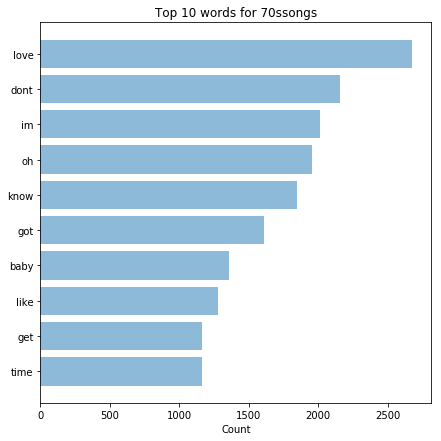

In [15]:
# split string into words then put it into a list
word_count(song_70s,50,'70s')

## Analyze 80s song lyrics

In [16]:
song_80s = data.loc[data['year'].between(1980, 1989, inclusive=True)]
#sanity check
print('years present here are: ',np.sort(song_80s['year'].unique()))
song_80s.head()

years present here are:  [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989]


,song,year,artist,genre,lyrics
index,,,,,
1065,electric-spanking-of-war-babies,1981,funkadelic,Rock,hi there you probably dont remember me right a...
1067,oh-i,1981,funkadelic,Rock,whoaoo whoaoo whoaoo whoahohoho oh i yeah ha o...
1068,shockwaves,1981,funkadelic,Rock,whoa i know hey mon the third world is on the ...
3487,shine-on,1982,george-duke,Jazz,shine with me baby shine on when you love some...
3489,i-will-always-be-your-friend,1982,george-duke,Jazz,we loved each other for so long tell me what w...


With stop words there word count is:  348150
No stop words, word count:  191943
50  most common words: 
[('love', 2886), ('im', 2455), ('dont', 2035), ('oh', 1813), ('know', 1779), ('like', 1480), ('youre', 1415), ('baby', 1337), ('got', 1336), ('time', 1210), ('one', 1161), ('get', 1128), ('never', 1097), ('want', 1067), ('go', 1049), ('cant', 967), ('well', 960), ('see', 960), ('yeah', 906), ('come', 875), ('way', 850), ('say', 839), ('ill', 799), ('back', 759), ('night', 757), ('la', 752), ('man', 728), ('make', 722), ('let', 706), ('ive', 694), ('take', 678), ('gonna', 673), ('day', 672), ('cause', 660), ('away', 636), ('theres', 630), ('right', 605), ('life', 600), ('could', 583), ('heart', 566), ('tell', 562), ('world', 560), ('think', 539), ('feel', 528), ('aint', 525), ('said', 507), ('look', 496), ('little', 485), ('need', 475), ('home', 472)]


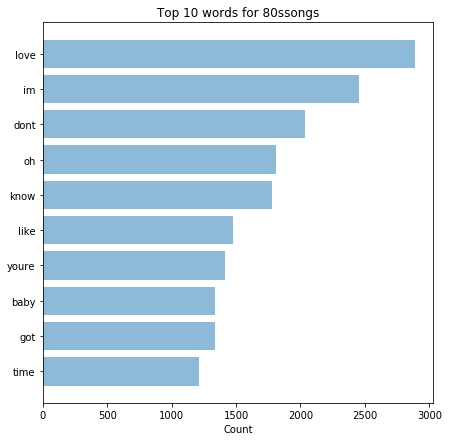

In [17]:
word_count(song_80s,50,'80s')

## Analyze 90s song lyrics

In [18]:
song_90s = data.loc[data['year'].between(1990, 1999, inclusive=True)]
#sanity check
print('years present here are: ',np.sort(song_90s['year'].unique()))
song_90s.head()

years present here are:  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999]


,song,year,artist,genre,lyrics
index,,,,,
261,down-2-tha-last-roach,1998,eazy-e,Hip-Hop,i still express yo i dont smoke weed or sess b...
262,real-muthaphuckkin-gs,1998,eazy-e,Hip-Hop,compton 5x ah real muthaphukkin gz 4x hey yo d...
263,exxtra-special-thankz,1998,eazy-e,Hip-Hop,19 muthaphukkin 93 and im back in this bitch s...
264,eternal-e,1998,eazy-e,Hip-Hop,yella yo this is yella as we wine down to the ...
265,hit-the-hooker,1998,eazy-e,Hip-Hop,eazye big titie shitty bang bang sittin on a d...


With stop words there word count is:  1463444
No stop words, word count:  808184
50  most common words: 
[('im', 10811), ('love', 9690), ('dont', 8421), ('know', 7761), ('like', 6827), ('got', 6272), ('oh', 5787), ('get', 5320), ('baby', 5310), ('one', 4806), ('time', 4555), ('go', 4455), ('youre', 4443), ('want', 4371), ('see', 4321), ('never', 4206), ('come', 4032), ('yeah', 3735), ('cant', 3698), ('say', 3656), ('ill', 3641), ('way', 3599), ('well', 3506), ('let', 3357), ('gonna', 3329), ('cause', 3220), ('back', 3130), ('make', 3041), ('man', 3009), ('take', 2995), ('night', 2867), ('life', 2807), ('away', 2794), ('ive', 2740), ('tell', 2710), ('heart', 2670), ('could', 2634), ('day', 2587), ('right', 2569), ('la', 2508), ('aint', 2504), ('feel', 2413), ('little', 2359), ('need', 2349), ('thats', 2315), ('de', 2295), ('said', 2291), ('good', 2285), ('theres', 2167), ('que', 2155)]


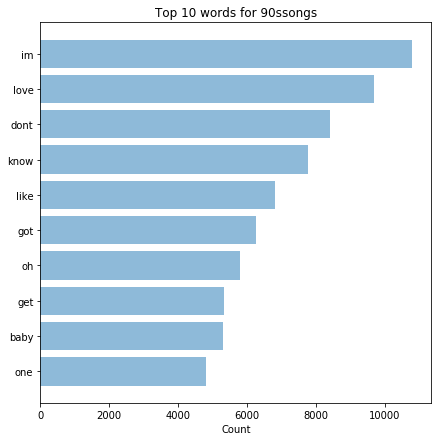

In [19]:
word_count(song_90s, 50,'90s')

## Analyze 2000s song lyrics

In [20]:
song_00s = data.loc[data['year'].between(2000, 2009, inclusive=True)]
#sanity check
print('years present here are: ',np.sort(song_00s['year'].unique()))
song_00s.head()

years present here are:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009]


,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know im gonna cut ri...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy its like you seem so...
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isnt hard to f...
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i verse 1 if i wrote a boo...
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party its popp...


With stop words there word count is:  35948890
No stop words, word count:  19852824
50  most common words: 
[('im', 284381), ('dont', 204658), ('know', 182934), ('love', 180975), ('like', 180737), ('got', 131682), ('get', 131442), ('time', 113851), ('one', 113624), ('see', 113008), ('oh', 110027), ('youre', 108016), ('go', 105707), ('never', 104919), ('want', 97293), ('cant', 95587), ('come', 90326), ('way', 85574), ('cause', 85465), ('say', 82128), ('baby', 82030), ('back', 80911), ('ill', 79945), ('make', 79105), ('take', 77703), ('let', 76282), ('yeah', 75182), ('life', 71450), ('away', 68660), ('feel', 65528), ('well', 62742), ('ive', 62566), ('right', 61270), ('gonna', 60952), ('man', 59846), ('aint', 59319), ('could', 58677), ('day', 57901), ('need', 56822), ('tell', 55981), ('heart', 55910), ('night', 55063), ('thats', 54862), ('world', 53381), ('theres', 49955), ('give', 49365), ('think', 49273), ('still', 46977), ('la', 46421), ('eyes', 46060)]


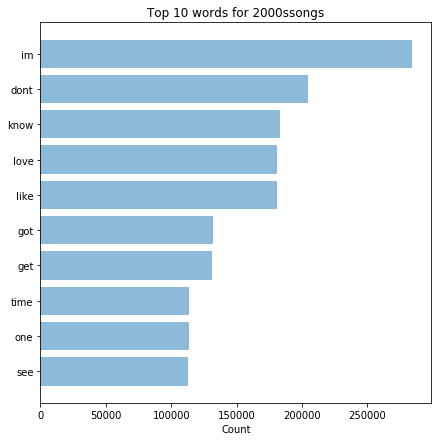

In [21]:
word_count(song_00s,50,'2000s')

## Analyze 2010s song lyrics

In [22]:
song_10s = data.loc[data['year'].between(2010, 2020, inclusive=True)]
#sanity check
print('years present here are: ',np.sort(song_10s['year'].unique()))
song_10s.head()

years present here are:  [2010 2011 2012 2013 2014 2015 2016]


,song,year,artist,genre,lyrics
index,,,,,
55,back-to-black,2013,beyonce-knowles,Pop,andre 3000 i i i left no time to regret kept m...
56,mine,2013,beyonce-knowles,Pop,verse 1 beyonce ive been watching for the sign...
57,superpower,2013,beyonce-knowles,Pop,verse 1 when the palm of my two hands hold eac...
58,haunted,2013,beyonce-knowles,Pop,intro presenter the winner is beyonce knowles ...
59,flawless,2013,beyonce-knowles,Pop,intro your challengers are a young group from ...


With stop words there word count is:  17284481
No stop words, word count:  9884244
50  most common words: 
[('im', 161526), ('like', 102173), ('dont', 102149), ('know', 93750), ('love', 92307), ('oh', 80266), ('got', 69488), ('get', 67140), ('go', 59703), ('youre', 54366), ('never', 51199), ('one', 49121), ('time', 49086), ('see', 48661), ('yeah', 47729), ('cant', 45483), ('baby', 43695), ('let', 43174), ('want', 41895), ('cause', 41262), ('back', 40750), ('come', 40612), ('make', 39630), ('say', 39256), ('way', 39041), ('take', 37635), ('ill', 37203), ('la', 36993), ('que', 36038), ('aint', 35716), ('wanna', 33178), ('feel', 32200), ('right', 31561), ('life', 31398), ('need', 30298), ('de', 29453), ('gonna', 29181), ('away', 28520), ('heart', 28413), ('ive', 27977), ('tell', 27902), ('girl', 27459), ('night', 26577), ('could', 26428), ('thats', 26216), ('day', 24929), ('well', 24400), ('give', 24197), ('keep', 24052), ('man', 23397)]


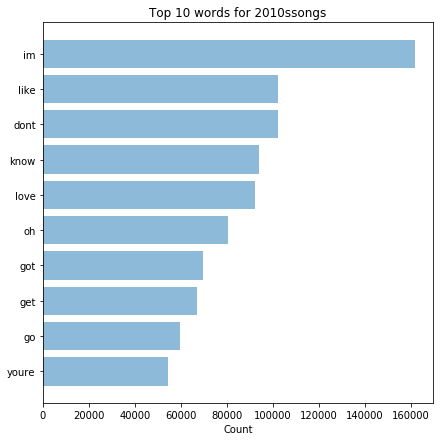

In [23]:
word_count(song_10s,50,'2010s')

## Analyze by Genre

In [24]:
data['genre'].unique()

array(['Pop', 'Hip-Hop', 'Rock', 'Metal', 'Other', 'Country', 'Jazz',
       'Electronic', 'Folk', 'R&B', 'Indie'], dtype=object)

Overall word count
With stop words there word count is:  55368728
No stop words, word count:  30911678
50  most common words: 
[('im', 461188), ('dont', 319422), ('like', 292494), ('love', 288537), ('know', 288070), ('got', 210390), ('get', 206197), ('oh', 199851), ('go', 171936), ('time', 169864), ('one', 169828), ('youre', 169260), ('see', 168058), ('never', 162312), ('cant', 146640), ('want', 145630), ('come', 136823), ('baby', 133730), ('cause', 131207), ('way', 129900), ('yeah', 128611), ('say', 126695), ('back', 126293), ('let', 124407), ('make', 123302), ('ill', 122286), ('take', 119819), ('life', 106888), ('feel', 101225), ('away', 101195), ('aint', 98641), ('right', 96709), ('gonna', 94964), ('ive', 94698), ('well', 92392), ('need', 90525), ('could', 88983), ('heart', 88024), ('man', 87784), ('tell', 87772), ('la', 87554), ('day', 86752), ('night', 85934), ('thats', 84435), ('world', 78973), ('wanna', 77525), ('give', 76428), ('girl', 75194), ('think', 74473), ('theres', 74255

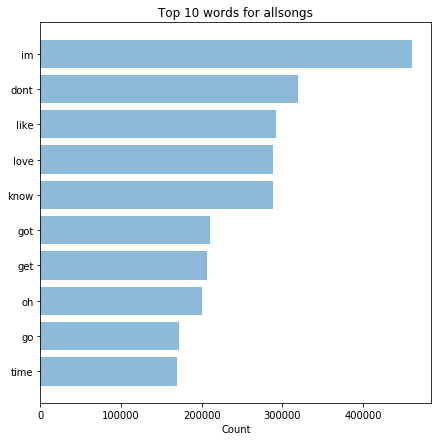

In [27]:
print('Overall word count')
word_count(data,50,'all')

With stop words there word count is:  9925430
No stop words, word count:  5633474
25  most common words: 
[('im', 86257), ('love', 83023), ('dont', 64044), ('know', 61659), ('oh', 58837), ('like', 50850), ('baby', 40005), ('youre', 39871), ('got', 35535), ('go', 34799), ('get', 34358), ('want', 33528), ('one', 32077), ('never', 31836), ('time', 31087), ('cant', 30291), ('see', 30262), ('yeah', 29156), ('let', 29075), ('que', 28387), ('la', 28115), ('cause', 27877), ('come', 27100), ('say', 26688), ('way', 26429)]


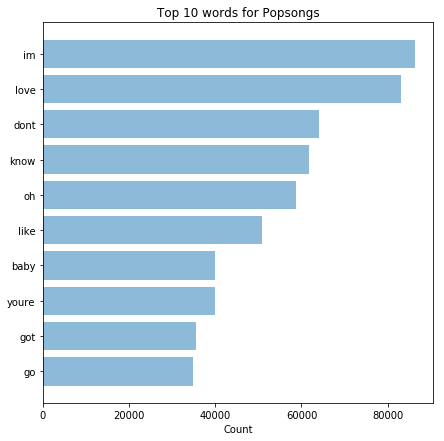

With stop words there word count is:  12146267
No stop words, word count:  7107958
25  most common words: 
[('im', 131215), ('like', 98903), ('get', 74731), ('got', 67197), ('dont', 66247), ('know', 61816), ('aint', 47388), ('nigga', 42722), ('cause', 39325), ('shit', 36567), ('go', 34823), ('see', 34187), ('yeah', 32786), ('love', 31845), ('back', 31410), ('niggas', 30981), ('ya', 30343), ('make', 29402), ('one', 29184), ('fuck', 29083), ('man', 28299), ('want', 27222), ('thats', 27034), ('yo', 26757), ('come', 25688)]


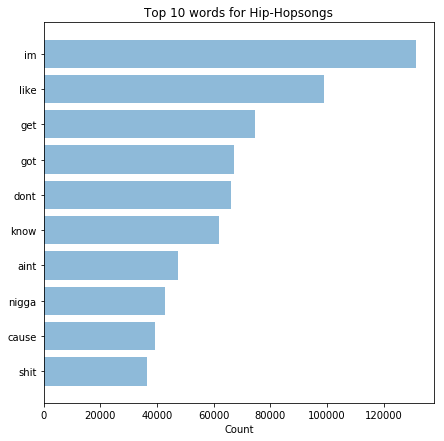

With stop words there word count is:  20772720
No stop words, word count:  11248502
25  most common words: 
[('im', 160946), ('dont', 128589), ('know', 110440), ('love', 102518), ('like', 92103), ('oh', 80021), ('youre', 76661), ('time', 73810), ('got', 73166), ('never', 67926), ('one', 67794), ('see', 66876), ('go', 66723), ('get', 64618), ('cant', 60287), ('want', 58479), ('way', 54445), ('come', 53440), ('say', 50883), ('away', 50158), ('ill', 50111), ('take', 49384), ('well', 48400), ('back', 47943), ('yeah', 47642)]


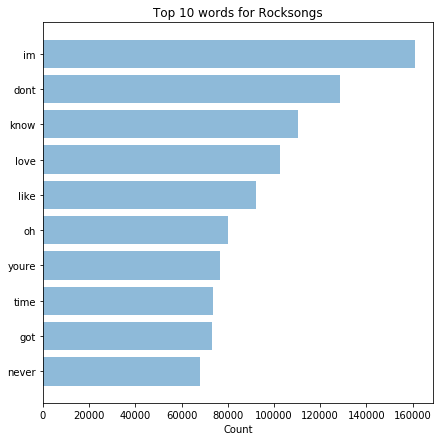

With stop words there word count is:  3998371
No stop words, word count:  2236258
25  most common words: 
[('im', 19167), ('life', 13910), ('time', 13155), ('one', 13078), ('dont', 12972), ('see', 12544), ('never', 12088), ('like', 12028), ('know', 10668), ('world', 8543), ('away', 8543), ('cant', 8396), ('eyes', 8287), ('youre', 8218), ('die', 8181), ('take', 7949), ('way', 7694), ('come', 7624), ('love', 7503), ('feel', 7128), ('back', 6940), ('us', 6920), ('blood', 6727), ('ill', 6695), ('go', 6501)]


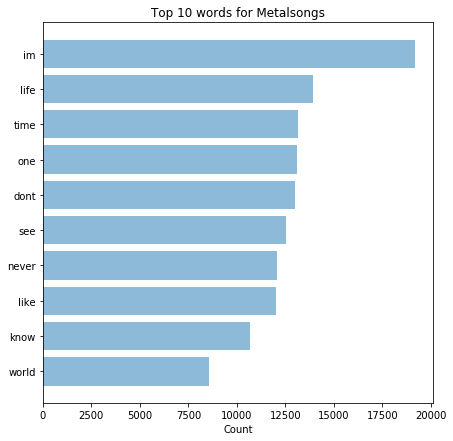

With stop words there word count is:  1159462
No stop words, word count:  722329
25  most common words: 
[('im', 8451), ('love', 6235), ('que', 5751), ('dont', 5744), ('know', 5352), ('de', 5280), ('like', 5007), ('oh', 4291), ('la', 4281), ('got', 3599), ('go', 3380), ('get', 3270), ('youre', 3196), ('one', 3117), ('time', 2924), ('never', 2874), ('see', 2816), ('baby', 2629), ('let', 2493), ('cant', 2419), ('say', 2322), ('come', 2298), ('ill', 2262), ('want', 2255), ('make', 2252)]


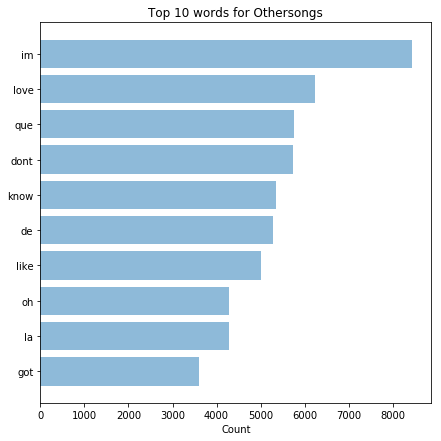

With stop words there word count is:  2672564
No stop words, word count:  1400406
25  most common words: 
[('love', 20343), ('im', 19443), ('dont', 14148), ('know', 12884), ('like', 12680), ('one', 10027), ('got', 9534), ('time', 9430), ('go', 8876), ('oh', 8866), ('ill', 8781), ('never', 8531), ('youre', 8266), ('well', 7982), ('way', 7847), ('back', 7794), ('ive', 7661), ('heart', 7343), ('get', 7263), ('see', 7123), ('little', 6993), ('cant', 6697), ('come', 6385), ('gonna', 6337), ('say', 6249)]


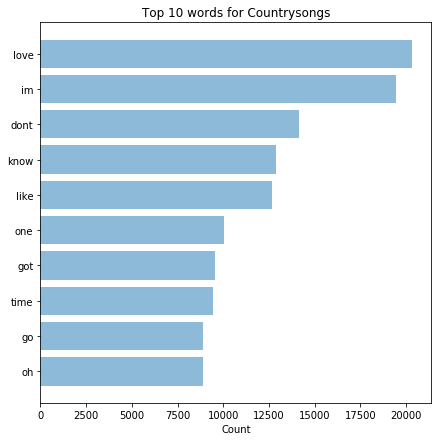

With stop words there word count is:  1369496
No stop words, word count:  754693
25  most common words: 
[('love', 13981), ('im', 9962), ('dont', 7136), ('know', 6973), ('oh', 6020), ('like', 5574), ('got', 5237), ('baby', 4832), ('youre', 4574), ('one', 4328), ('go', 4238), ('never', 4171), ('come', 4039), ('see', 3842), ('heart', 3840), ('time', 3813), ('get', 3788), ('say', 3763), ('ill', 3760), ('way', 3550), ('cant', 3536), ('let', 3285), ('day', 3229), ('well', 3063), ('make', 3017)]


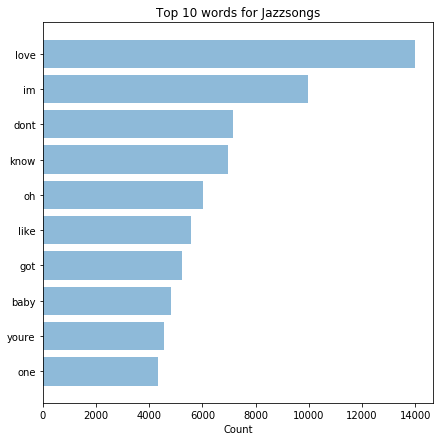

With stop words there word count is:  1536721
No stop words, word count:  850965
25  most common words: 
[('im', 12536), ('love', 10734), ('dont', 9404), ('know', 7932), ('like', 7435), ('oh', 6979), ('get', 6315), ('go', 6241), ('youre', 5423), ('come', 5416), ('see', 5194), ('want', 5143), ('cant', 4996), ('got', 4974), ('time', 4926), ('feel', 4925), ('one', 4838), ('never', 4613), ('make', 4109), ('take', 4072), ('let', 4009), ('baby', 3944), ('yeah', 3914), ('way', 3795), ('say', 3706)]


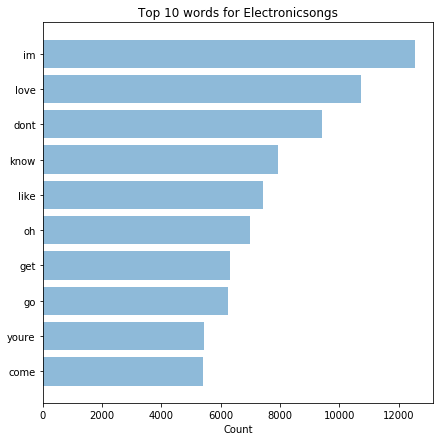

With stop words there word count is:  404312
No stop words, word count:  231557
25  most common words: 
[('im', 1731), ('love', 1716), ('go', 1403), ('oh', 1367), ('like', 1351), ('know', 1243), ('dont', 1144), ('never', 1025), ('see', 1005), ('time', 997), ('one', 931), ('come', 851), ('away', 848), ('well', 820), ('day', 818), ('way', 802), ('ill', 782), ('youre', 758), ('que', 758), ('de', 731), ('got', 724), ('heart', 716), ('let', 666), ('get', 659), ('ive', 656)]


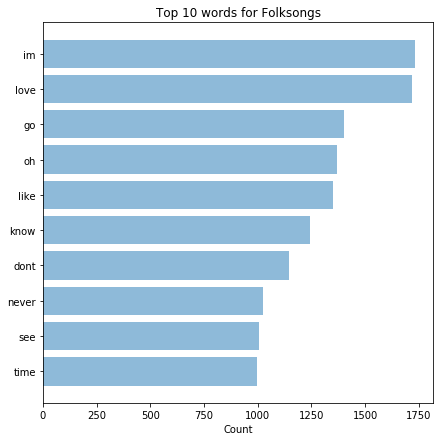

With stop words there word count is:  764127
No stop words, word count:  399240
25  most common words: 
[('love', 7392), ('im', 6708), ('dont', 6015), ('baby', 5502), ('know', 5300), ('oh', 4759), ('got', 3628), ('like', 3497), ('youre', 3157), ('get', 3148), ('want', 3139), ('yeah', 3127), ('cant', 2808), ('go', 2778), ('time', 2762), ('one', 2649), ('see', 2504), ('never', 2497), ('make', 2403), ('let', 2373), ('girl', 2296), ('say', 2270), ('come', 2245), ('cause', 2164), ('back', 2039)]


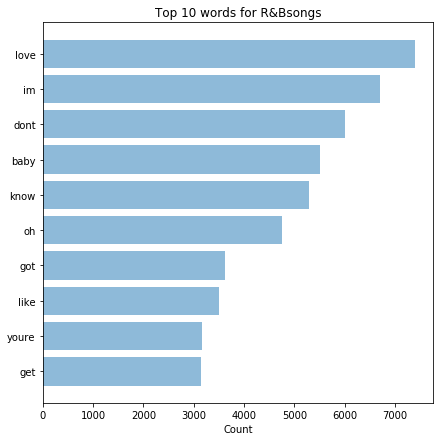

With stop words there word count is:  619258
No stop words, word count:  326296
25  most common words: 
[('im', 4772), ('dont', 3979), ('know', 3803), ('love', 3247), ('like', 3066), ('oh', 2832), ('youre', 2269), ('go', 2174), ('time', 2090), ('never', 1897), ('get', 1855), ('one', 1805), ('come', 1737), ('see', 1705), ('ill', 1682), ('got', 1618), ('say', 1610), ('way', 1515), ('ive', 1514), ('want', 1493), ('let', 1489), ('take', 1434), ('cant', 1428), ('well', 1392), ('back', 1374)]


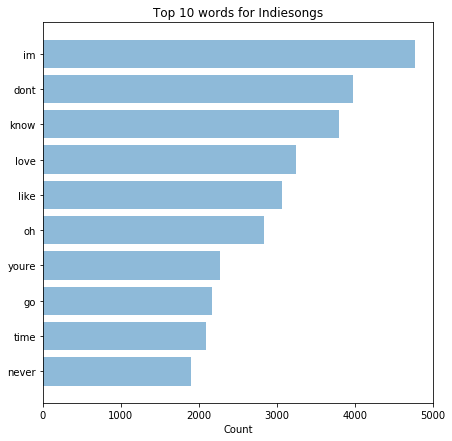

In [25]:
,for genre in data['genre'].unique():
    df = data.loc[data['genre']==genre]
    word_count(df,25,genre)